In [25]:
# 1.1.4 Activities 2

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.stats import pearsonr

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Notas:

Revisar el punto 8

1. Decidir si cada una de las siguientes afirmaciones es verdadera o falsa.

- La variable que se va a predecir en la regresión se denomina variable independiente. <br>
R./ Falso, La variable que se va a predecir en la regresión se denomina variable **dependiente**.

- Si en el análisis de regresión simple la pendiente de la recta es negativa, entonces hay correlación lineal negativa entre las variables. <br>
R./ Verdadero, si en el análisis de regresión simple la pendiente de la recta es negativa, entonces hay **correlación lineal negativa** entre las variables.

- La nube de puntos es una representación gráfica que nos permite visualizar la posible relación entre dos variables. <br>
R./ Verdadero, la nube de puntos es una representación gráfica que nos permite visualizar la posible relación entre dos variables, lo que facilita la identificación de patrones o tendencias en los datos.

- El coeficiente de correlación lineal siempre toma valores entre −2 y 2. <br>
R./ Falso, el coeficiente sde correlación lineal toma valores entre -1 y 1.

- El coeficiente de determinación puede tomar valores negativos. <br>
R./ Falso, el coeficiente de determinación, comúnmente conocido como R cuadrado, es una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente(s). Este coeficiente siempre toma valores entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos y 0 indica que el modelo no explica la variabilidad de la variable dependiente. Por lo tanto, el coeficiente de determinación no puede tomar valores negativos.

- Un coeficiente de correlación lineal casi cero indica que la relación lineal entre las variables dependiente e independiente es muy débil.<br>
R./ Verdadero, un coeficiente de correlación lineal cercano a cero indica que la relación lineal entre las variables dependiente e independiente es muy débil o casi inexistente. 

- Si el coeficiente de correlación lineal vale 1 se dice que hay correlación lineal perfecta positiva.<br>
R./ Verdadero, cuando el coeficiente de correlación lineal tiene un valor de 1, se dice que hay una correlación lineal perfecta positiva entre las variables. Esto significa que a medida que una variable aumenta, la otra variable también aumenta en una relación proporcional.

- La variable que se predice en el análisis de regresión es la variable dependiente.<br>
R./ Verdadero, En el análisis de regresión, la variable que se predice se denomina la variable dependiente. Esta variable es la que se intenta predecir o explicar en función de una o más variables independientes.

- Un coeficiente de correlación negativo entre la variable dependiente Y y la variable independiente X, indica que al aumentar X se esperan disminuciones en Y.<br>
R./ Verdadero, Un coeficiente de correlación negativo entre la variable dependiente Y y la variable independiente X indica que al aumentar X, se esperan disminuciones en Y. 

2. Observe el siguiente diagrama de dispersión con atención.

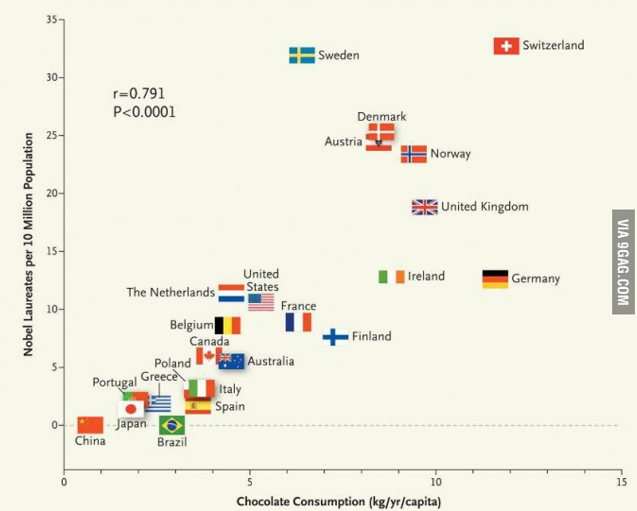

Interprete el coeficiente de correlación reportado en el diagrama. ¿Qué conclusión puede obtener usted? ¿Qué opina de esa conclusión?

R./ Existe correlacion, a medida que un país consume más chocolate el número de premios nobel aumenta, pero es una correlacion falsa ya que los dos fenomenos nobel y chocolate no tienen una relación real. 

La conclusión de que el consumo de chocolate causa que un país tenga más premios Nobel es poco probable. Es más probable que la correlación observada se deba a otras variables, como la riqueza del país, el nivel educativo o la cultura.

3. Se han realizado cinco observaciones sobre dos variables, X e Y, tabuladas de la siguiente forma

|X |5 |7 |10|13|15|
|--|--|--|--|--|--|
|Y |2 |3 |4 |5 |6 |

Complete la siguiente tabla de reporte haciendo cálculo manuales, luego ajuste el modelo en R y compare sus resultados con los de R.

R./ Usare Python

In [28]:
import numpy as np

# List to arrays NumPy

y = [2,3,4,5,6]
y = np.array(y)

x = [5,7,10,13,15]
x = np.array(x).reshape(-1, 1)

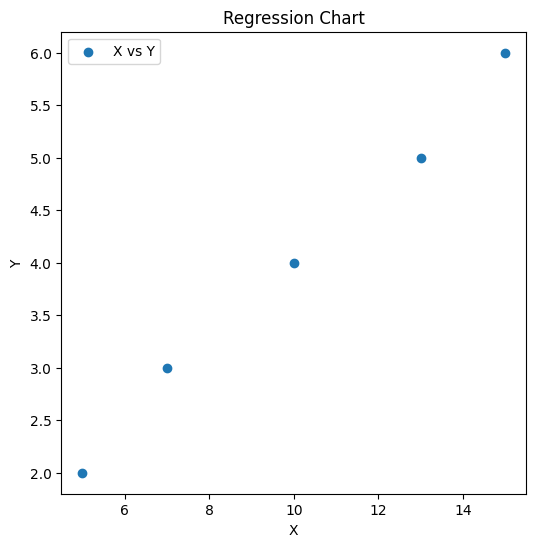

In [29]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='X vs Y')
plt.title('Regression Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

In [30]:
# Lineal regression
modelo = LinearRegression().fit(x, y)
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

linea_regresion = pendiente * x + intercepto

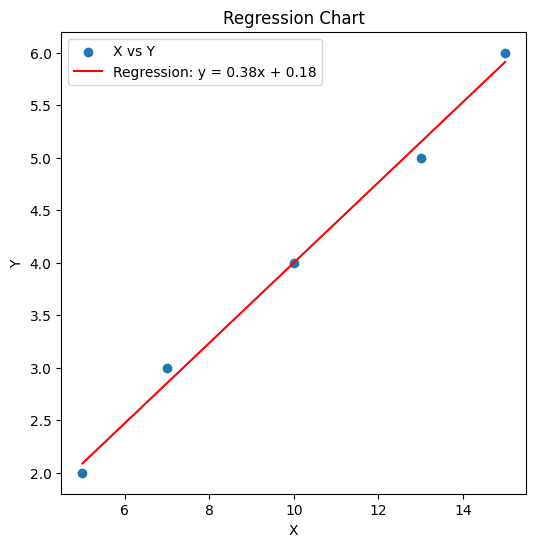

In [31]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='X vs Y')
plt.plot(x, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [32]:
# Obtener los coeficientes beta
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

In [33]:
# Número de observaciones
n = len(x)

# Calcular el error estándar de la estimación
y_pred = modelo.predict(x)
error = y - y_pred
error_estandar = np.sqrt(np.sum(error**2) / (n - 2))

# Calcular la desviación estándar de los coeficientes
X_mean = np.mean(x)
desv_est_beta_1 = error_estandar / (np.sqrt(np.sum((x - X_mean)**2)))
desv_est_beta_0 = error_estandar * np.sqrt(np.sum(x**2) / (n * np.sum((x - X_mean)**2)))

In [34]:
error_estandar, desv_est_beta_0, desv_est_beta_1

(0.14002800840280064, 0.18098793347787134, 0.01698089027028307)

In [35]:
# Calcular los intervalos de confianza para los coeficientes beta
t_value = stats.t.ppf(0.975, df=n-2)  # Valor crítico de t para un intervalo de confianza del 95%
intervalo_beta_1 = t_value * desv_est_beta_1
intervalo_beta_0 = t_value * desv_est_beta_0

# Imprimir los intervalos de confianza
print("Intervalo de confianza para beta_1:", (beta_1 - intervalo_beta_1, beta_1 + intervalo_beta_1))
print("Intervalo de confianza para beta_0:", (beta_0 - intervalo_beta_0, beta_0 + intervalo_beta_0))


Intervalo de confianza para beta_1: (0.3283121696753708, 0.43639371267757043)
Intervalo de confianza para beta_0: (-0.3995137919623917, 0.7524549684329795)


In [36]:
y_pred = modelo.predict(x)

df_results = pd.DataFrame({'X': x.flatten(), 'y': y.flatten(), 'pred': y_pred.flatten()})
df_results['error'] = df_results['y'] - df_results['pred']

df_results

,X,y,pred,error
0,5,2,2.088235,-0.088235
1,7,3,2.852941,0.147059
2,10,4,4.000000,0.000000
3,13,5,5.147059,-0.147059
4,15,6,5.911765,0.088235


In [37]:
mse = mean_squared_error(y, y_pred)
rse = np.sqrt(mse)
mse, rse

(0.011764705882352884, 0.10846522890932782)

In [38]:
error_estandar

0.14002800840280064

In [39]:
r2_score(y, y_pred)

0.9941176470588236

Falta calcular la anova

4. Un investigador decidió estudiar la relación entre los gastos familiares y el ahorro familiar en grupo de familias de un barrio de la ciudad. El investigador recolectó la información (en miles de pesos) y ajustó el modelo que a él le interesa en R. Los resultados obtenidos se presentan a continuación.

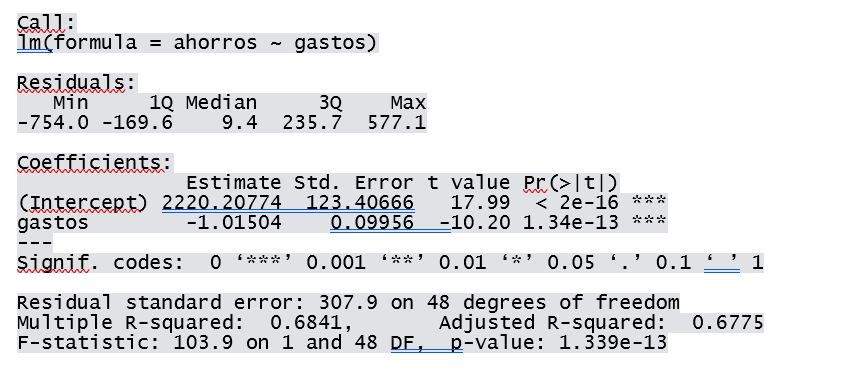

Basándose en los resultados de R responda las siguientes preguntas.

- ¿Cuál es la variable respuesta? ¿Cuál es la covariable?

R./ <br>
Variable respuesta: ahorros <br>
Covariable: gastos

- ¿Cuántas familias estudió el investigador? <br>

R./ n = 25

- Escriba el modelo ajustado al cual llegó el investigador.

R./ $\hat{Ahorro} = 2220.21 - 1.02 * Gastos $

- Interprete en el contexto del problema los coeficientes del modelo.

R./ 

$\hat{\beta_{0}}$ Para una familia que sus gastos sean 0 (no tenga gastos) su ahorro promedio seria de $ 2220.21 

$\hat{\beta_{1}}$ Por cada unidad de gasto el ahorro dismunuye $1.015

- ¿Cuál es la varianza estimada de los errores?

R./ 307.9 ** 2 = 94802.41

- ¿Cuál es el error estándar del coeficiente asociado a la covariable?

R./ 0.09956 

- Una teoría económica reciente afirma que por cada peso adicional que una familia gasta, el ahorro familiar disminuye en promedio 1.2 pesos. El investigador al ver los resultados de su estudio piensa que la teoría está errada y considera que la disminución en el ahorro es diferente al de la teoría. Escriba las hipótesis del problema y pruebe esta afirmación a un nivel de significancia del 5%.

R./ 

$$ H_0: \beta_{1} = 1.2 $$
$$ H_1: \beta_{1} \neq 1.2 $$

Estadistico calculado:

$ to=1.8577 $ <br>
$ valor-p \in (5\%, 10\%) 

Conclusión: No hay suficiente evidencia muestral para rechazar $ H_0 $.

- Construya un intervalo de confianza del 95% para el coeficiente de los gastos. ¿Incluye este intervalo el valor de referencia del literal anterior? ¿Qué conclusión se puede obtener en relación a la hipótesis del intervalo anterior?

R./ 

$ \hat{\beta_1} = -1.01504 $

$ se(\hat{\beta_0}) = 0.09956 $

$ n = 20 $  

$ 𝑀𝑆_{𝑅𝑒𝑠} = 0.09956  $ 

$ t_{\frac{\alpha}{2}, n-2} = t_{\frac{0.05}{2}, n-2} = t_{0.025, 18} = 2.101 $

Los intervalos de confianza son:

$$ -1.22421556 \leq \hat{\beta_1} = -1.01504 \leq -0.805864439 $$ 

Conclusión: No hay suficiente evidencia muestral para rechazar $ H_0 $, el intervalo incluye -1.2 por lo que no es posible rechazar $ H_0 $.

- Si una familia tiene un gasto mensual de millón y medio de pesos, ¿cuál es el ahorro medio esperado para esa familia en ese mes?

R./ 

Para una familia que tiene un gasto mensual de millón y medio de pesos, el ahorro medio esperado en ese mes es de: 

$$ \hat{y} = 2220.20774 - 1.01504 * 1.5m = 697647.74  = 0.697647,74m$$

- Haga una interpretación del R2.

R./ El 68.41% de la variabilidad del ahorro fue explicada por el modelo estudiado, el 31.59% es debida al azar.

- Aplique la prueba de significancia de la regresión por medio del análisis de varianza (anova) con un nivel de significancia del 5%. ¿Cuál es su conclusión?

R./ 

El estadístico es: $ F = 103.9 $ <br>
valor-P es: $1.339e-13$ 

Conclusión: Hay suficiente evidencia muestral para rechazar $ H_1 $, por lo que podemos sugerir que $ H_1 \neq 0 $.

- ¿Cuál es la conclusión al probar el siguiente conjunto de hipótesis:

$$ H_0: \beta_{0} = 0 $$
$$ H_1: \beta_{0} \neq 0 $$

a un nivel de significancia $\alpha$ del 5%?

R./ 

El estadístico es: $ t-value = 17.99$ <br>
valor-P es: $2e-16$

Conclusión: Hay suficiente evidencia muestral para rechazar $ H_0 $, por lo que podemos sugerir que $ H_0 \neq 0 $.

- ¿Qué signo debería tener el coeficiente de correlación lineal entre el gasto y el ahorro familiar mensual?

R./ Negativo, ya que hay una relación lineal y cada vez que aumenta el gasto disminuye el ahorro.

5. Un ingeniero calculó los coeficientes de correlación entre seis pares de variables y los resultados fueron: -0.94, 0.86, 0.01, 0.01, -1 y 1. Desafortunadamente el ingeniero olvidó a que diagrama (a, b, c, d, e, f) correspondía cada coeficiente. Por favor ayúdele al ingeniero a relacionar cada coeficiente obtenido con cada diagrama de dispersión.

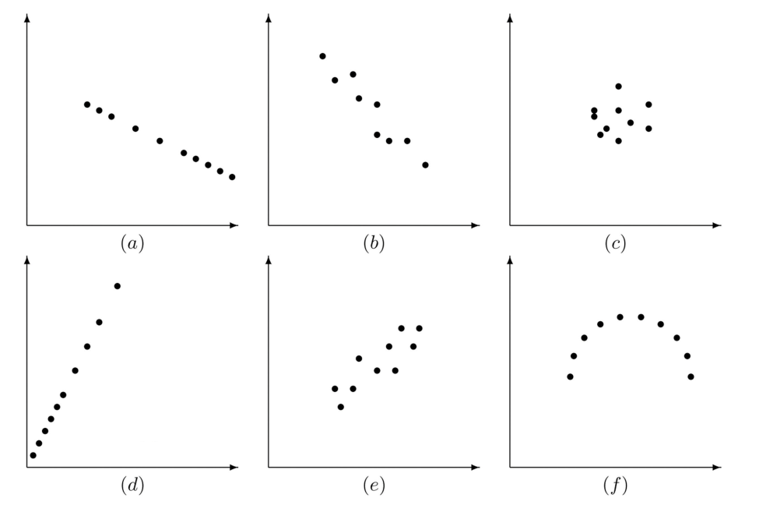

R./

|a|b|c|d|e|f|
|---|---|---|---|---|---|
|1|0.8 - 0.9|0.1 - 0.2|1|0.8 - 0.9|0.1 - 0.2|

6. Una compañía desea hacer predicciones del valor anual de sus ventas totales en cierto país a partir de la relación de éstas y la renta nacional. Para investigar la relación cuenta con los siguientes datos:

|X|189| 190| 208| 227| 239| 252| 257| 274| 293| 308| 316|
|--|--|--|--|--|--|--|--|--|--|--|--|
|Y|402| 404| 412| 425| 429| 436| 440| 447| 458| 469| 469|

X representa la renta nacional en millones de euros e Y representa las ventas de la compañía en miles de euros en el periodo que va desde 1990 hasta 2000 (ambos inclusive). 

In [40]:
x = [189, 190, 208, 227, 239, 252, 257, 274, 293, 308, 316]
y = [402, 404, 412, 425, 429, 436, 440, 447, 458, 469, 469]

r, p = stats.pearsonr(x, y)
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9984246043304559, p-value=1.427867846807425e-12


- Sin hacer cálculos, es decir, sólo observando la tabla anterior, ¿puede usted dar un valor para el coeficiente de correlación entre X y Y? 

R./

- Calcule manualmente e interprete el coeficiente de correlación.

R./

- Obtener el coeficiente de correlación.

R./ 0.9984

7. En la siguiente figura se presentan los patrones de puntos de varios diagramas de dispersión para las variables X y Y, así como el coeficiente de correlación lineal. ¿Escriba una conclusión de los patrones observados?

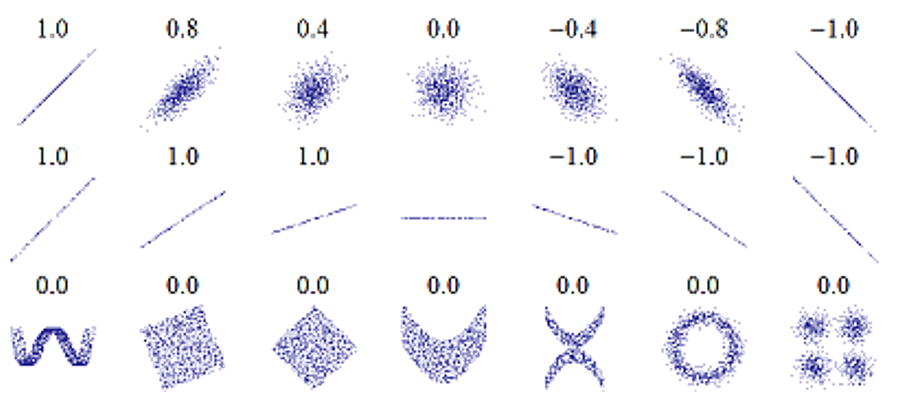

R./ 

Los diagramas de dispersión muestran una variedad de patrones de puntos, desde una distribución aleatoria hasta una correlación lineal perfecta positiva o negativa.

El coeficiente de correlación lineal (r) indica la fuerza y la dirección de la relación entre las variables.

Es importante observar el patrón de puntos y el valor de r para determinar la naturaleza de la correlación entre las variables.


8. Se conduce un experimento en 12 sujetos para analizar si la dosis de cierta droga (en ml) está relacionada con el tiempo de reacción a un estímulo en segundos. La tabla siguiente muestra los resultados del experimento. El objetivo es ajustar un modelo de regresión lineal entre las variables estudiadas.

|X|1| 1.5| 2| 2.5| 3| 3.5| 4| 4.5| 5| 5.5| 6| 6.5|
|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Y|1| 0.8| 1.8| 1.4| 2.1| 1.8| 2.2| 3| 2.75| 3| 4.1| 4.9|

- ¿Cuál es la estimación y el error estándar del intercepto del modelo de interés?

- Construya un IC del 95% para estimar el verdadero intercepto y concluya.

- Un estudio anterior indicó que por cada ml adicional de droga que se le suministra a un paciente el tiempo de reacción aumenta en 0.4 segundos. Los investigadores actuales sospechan que el incremento en el tiempo de reacción es diferente al anunciado en el estudio previo. Escriba las hipótesis y concluya con un nivel del 5%.

R./

In [60]:
y_machine = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]

x_machine = [1, 0.8, 1.8, 1.4, 2.1, 1.8, 2.2, 3, 2.75, 3, 4.1, 4.9]

y_machine = np.array(y_machine)
x_machine = np.array(x_machine).reshape(-1, 1)

# Crear el modelo de regresión lineal
modelo = LinearRegression().fit(x_machine, y_machine)

# Obtener los coeficientes beta
beta_1 = modelo.coef_[0]
beta_0 = modelo.intercept_

# Linea de regresion
linea_regresion = beta_1 * x_machine + beta_0

# Número de observaciones
n = len(x_machine)

# Calcular el error estándar de la estimación
y_pred = modelo.predict(x_machine)
error = y_machine - y_pred
error_estandar = np.sqrt(np.sum(error**2) / (n - 2))

# Calcular la desviación estándar de los coeficientes
X_mean = np.mean(x_machine)
desv_est_beta_1 = error_estandar / (np.sqrt(np.sum((x_machine - X_mean)**2)))
desv_est_beta_0 = error_estandar * np.sqrt(np.sum(x_machine**2) / (n * np.sum((x_machine - X_mean)**2)))

# Calcular los intervalos de confianza para los coeficientes beta
t_value = stats.t.ppf(0.975, df=n-2)  # Valor crítico de t para un intervalo de confianza del 95%
intervalo_beta_1 = t_value * desv_est_beta_1
intervalo_beta_0 = t_value * desv_est_beta_0


# Imprimir error estandar
print("Error estandar para beta_0:", (desv_est_beta_0))
print("Error estandar para beta_1:", (desv_est_beta_1))


# Imprimir los intervalos de confianza
print("Intervalo de confianza para beta_0:", (beta_0 - intervalo_beta_0, beta_0 + intervalo_beta_0))
print("Intervalo de confianza para beta_1:", (beta_1 - intervalo_beta_1, beta_1 + intervalo_beta_1))

Error estandar para beta_0: 0.42849661577713083
Error estandar para beta_1: 0.16033042288028393
Intervalo de confianza para beta_0: (-0.5440149688236959, 1.3654849462733394)
Intervalo de confianza para beta_1: (1.0317106071120805, 1.7461874958551387)


Hipótesis:

$$ H_0: \beta_1 = 0.4 $$
$$ H_1: \beta_1 \neq 0.4 $$

$\beta_1$ = 1.3889490514836096 <br>
error $\beta_1$ = 0.16033042288028393 <br>
n = 12

Estadístico de prueba:

$$ 𝑡_0 = \frac{\hat{\beta_1} - \beta_{10}}{se(\hat{\beta_1})} = \frac{1.38894 - 0.4}{0.1603} = 6.168193370400086 $$

De la tabla t-student con $df=10$ Valor-P 2.22

Como Valor-P > 0.05 hay evidencias para rechazar $H_1$, por lo que hay una relación lineal entre la resistencia del corte y la edad del propelente.

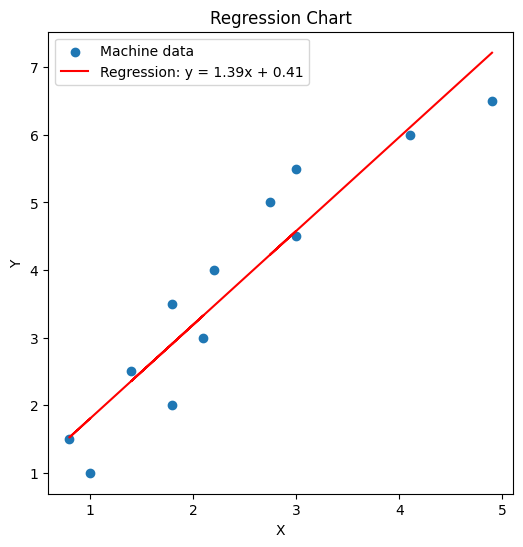

In [57]:
# Create the chart
plt.figure(figsize=(6, 6))
plt.scatter(x_machine, y_machine, label='Machine data')
plt.plot(x_machine, linea_regresion, color='red', label=f'Regression: y = {pendiente:.2f}x + {intercepto:.2f}')
plt.title('Regression Chart')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

9. ¿Practicar en un simulador de conducción nos ayudaría a manejar mejor en Inglaterra? Para responder esta pregunta un grupo de investigadores realiza un experimento con voluntarios para estudiar el efecto que tiene el tiempo de práctica en un simulador de conducción sobre el número de errores cometidos al manejar sobre una pista con obstáculos con auto de conductor a la derecha. A continuación se muestra el tiempo en minutos que los voluntarios pasaron en el simulador y el número de errores cometidos por los voluntarios luego de la práctica en el simulador.

|Tiempo|49.4| 86.4| 20.81| 51.69| 89.99| 31.17| 129.56| 102.93| 14.56| 19.46|
|--|--|--|--|--|--|--|--|--|--|--|
|Errores|36.0| 23.0| 45.00| 33.00| 23.00| 42.00| 11.00| 19.00| 47.00| 44.00|

Responda las preguntas siguientes usando sólo su calculadora, NO use R para responderlas.

- Ajuste el modelo de regresión lineal apropiado y escriba la ecuación de regresión.
- Pruebe la significancia de la regresión usando el método ANOVA. Escriba las hipótesis y use α=5% para concluir.
- Para la versión anterior del simulador se concluyó que por cada minuto adicional que un conductor practicaba el número medio de errores disminuía en 0.29. Realice una prueba de hipótesis para determinar si ha cambiado la premisa, use un nivel de significancia del α=5%.
- Calcule el coeficiente de determinación del modelo e interprételo.


In [3]:
tiempo = [49.4, 86.4, 20.81, 51.69, 89.99, 31.17, 129.56, 102.93, 14.56, 19.46]
errores = [36.0, 23.0, 45.00, 33.00, 23.00, 42.00, 11.00, 19.00, 47.00, 44.00]

10. Un investigador está estudiando los datos correspondientes a diferentes medidas del cuerpo humano (edad, peso, estatura, sexo, medidas del esqueleto y musculares) de un grupo de personas. Los datos corresponden a una muestra de personas que acuden periódicamente a un gimnasio y se han obtenido de la revista electrónica Journal of Statistics Educations, Vol. 11, Nº 2, “Exploring Relationships in Body Dimensions”. Este investigador decide construir un modelo que permita predecir el peso (Kg) de una persona en función de su altura (cm). A continuación se presentan los resultados del ajuste que el investigador obtuvo con R.

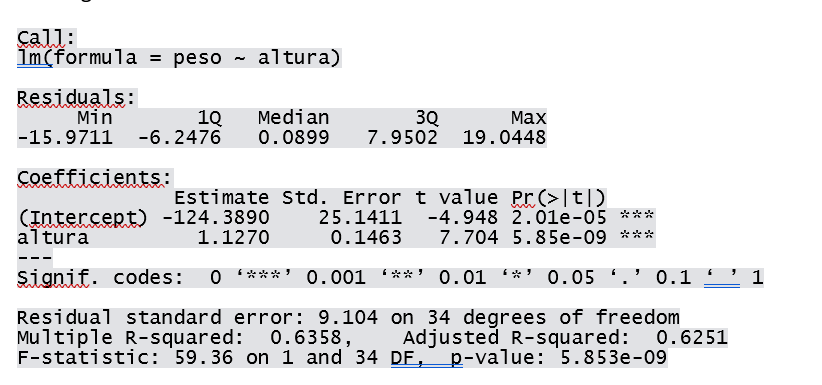

Complete los espacios indicados por “____________” de manera que las siguientes afirmaciones sean verdaderas. Justifique sus respuestas con el procedimiento completo.

R./
	
- La estimación para la varianza de los errores es 9.104^2=82.88
- El error estándar para el coeficiente de la variable regresora es 0.1463
- El número de observaciones en la muestra utilizada fue de 36
- Al probar la hipótesis $ H_0: \beta_1 = 0 $ con un nivel $ \alpha $ = 3 % se concluye que se rechaza $ H_0 $.
- Al probar la hipótesis $ H_0: \beta_1 = 2 $ con un nivel $ \alpha $ = 3 % se concluye que se rechaza $ H_0 $.
- Un intervalo de confianza del 90% para $ \beta_1 $ es (0.8797 ; 1.3742)
- El porcentaje de la variabilidad de la variable independiente, ninguna, la variable que fue explicada por el modelo fue la dependiente, es decir la Y.

11. Suponga que usted tiene la tarea de encontrar estimaciones para los parámetros de un modelo de regresión lineal simple maximizando la función de verosimilitud usando un conjunto de datos simulados. El código usado para generar los datos es el siguiente:

$$ x <- rpois(n=100, lambda=15) $$
$$ y <- rnorm(n=length(x), mean=5-3*x, sd=4) $$

La función de verosimilitud en R para este problema se puede escribir así:

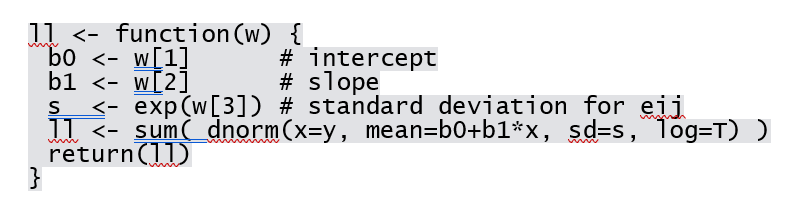


- Escriba el vector de parámetros a estimar para este problema, indique con claridad sus componentes.

R./ $$ \theta =[(\beta_0, \beta_1 , \sigma ^2)]^T $$

- Escriba el código en R para encontrar estimaciones de los parámetros usando la función optim( ) 

R./ 

- ¿Tiene usted alguna modificación o cambio que se deba hacer en el código anterior para poder obtener las estimaciones?

R./ 

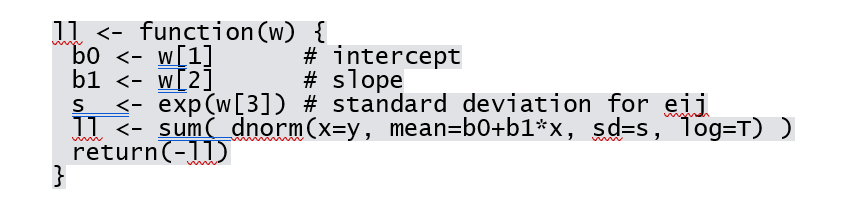


In [46]:
print('ok_')

ok_
